In [11]:
import numpy as np
import matplotlib.pyplot as plt

K Means Implementation

In [12]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    ### START CODE HERE ###
    for i in range(X.shape[0]):
        distance= []
        for j in range(K):
            dis= np.linalg.norm(X[i]- centroids[j])
            distance.append(dis)
        idx[i]= np.argmin(distance)
    
     ### END CODE HERE ###
    
    return idx

In [13]:
# UNQ_C2
# GRADED FUNCTION: compute_centroids

def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    
    ### START CODE HERE ###
    for i in range(K):
        points=X[idx==i]
        centroids[i]= np.mean(points, axis=0)
    ### END CODE HERE ## 
    
    return centroids

In [14]:

def run_kMeans(X, initial_centroids, max_iters=10):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids 
    idx = np.zeros(m)

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    return centroids, idx

In [15]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

Training Model On Image

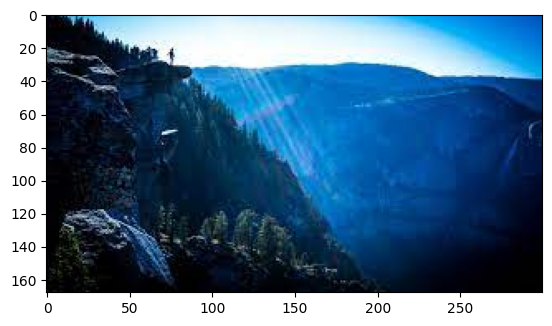

In [16]:
original_img = plt.imread('Images/download (1).jpeg')
plt.imshow(original_img)

In [17]:
original_img.shape

(168, 300, 3)

In [18]:

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [19]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16
max_iters = 12

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means - this can take a couple of minutes depending on K and max_iters
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/11
K-Means iteration 1/11
K-Means iteration 2/11
K-Means iteration 3/11
K-Means iteration 4/11
K-Means iteration 5/11
K-Means iteration 6/11
K-Means iteration 7/11
K-Means iteration 8/11
K-Means iteration 9/11
K-Means iteration 10/11
K-Means iteration 11/11


Image Compression Logic Using KMeans Unsupervised Model

In [20]:
idx = find_closest_centroids(X_img, centroids)
X_compressed = centroids[idx, :]
X_compressed= np.reshape(X_compressed, original_img.shape).astype(np.uint8)

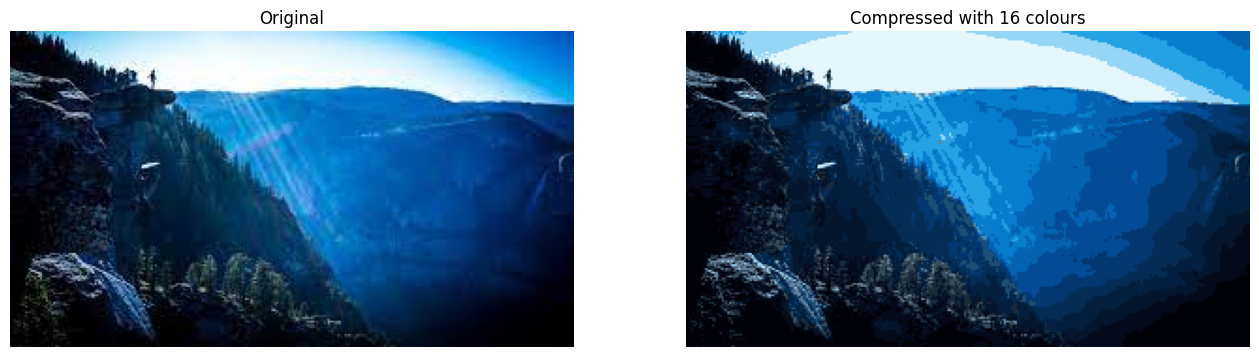

In [21]:
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()